<div align="center">

### **Project Final Report: Predicting Newsletter Subscriptions Based on Player Characteristics and Engagement**


</div>

<div align="center">

## **Section 1: Introduction**

</div>

Understanding player engagement is important for planning and managing a game research project. In this study, we investigate which types of players are more likely to subscribe to a game-related newsletter. Subscribing to a newsletter may show a player’s deeper interest in the game and their willingness to stay involved in future updates or events. Knowing which player characteristics and behaviors are linked to subscriptions can help the research team target recruitment efforts and allocate resources more effectively.

Our research question is: **`What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?`**

Our specific questions is : **`Which player characteristic, among gender, age, experience and hours played and behaviors, can predict subscription to a game-related newsletter, and how do these features differ between various player types?`**

We have two datasets: players.csv and sessions.csv

<div align="center">

## **Data Overview**

</div>

To answer our research question, we use two datasets: `players.csv` and `sessions.csv`. Below is a summary of their structure, potential issues, and our reasoning for selecting one over the other.

### 1. `players.csv`: Player Characteristics Data

#### Dataset Summary

| Player.csv       | Value |
|-----------------|-------|
| Number of Observations | 196 |
| Number of Variables    | 7   |


| **Variable Name**  | **Data Type**  | **Description**  | **Mean (if applicable)**  | **Standard Deviation** | **Min** | **Max** |
|-------------------|--------------|-----------------|----------------------|--------------------|------|------|
| **experience**    | Character    | 4 types of Player’s experience level: Beginner, Regular, Veteran, Pro | / | / | / | / |
| **subscribe**     | Logical (TRUE/FALSE) | Whether the player subscribed to the game newsletter | / | / | / | / |
| **hashedEmail**   | Character    | Anonymized player email | / | / | / | / |
| **played_hours(hr)**  | Numeric (dbl) | Total hours the player has spent in the game | 5.85 | 28.50 | 0 | 223 |
| **name**         | Character    | Player’s in-game name | / | / | / | / |
| **gender**       | Character    | Player’s gender (Male/Female) | / | / | / | / |
| **Age(year)**          | Integer      | Age of Player | 20.52 | 6.17 | 8 | 50 |



### *Potential Issues (players.csv):*
1. **Missing Values in Age Column**  
   - The `Age` column contains 2 missing values (`NA`).
   - This could affect age-related analysis and might require imputation.
2. **Inconsistent variable name**
   - For consistent, the Age column should be lower case.
3. **Extremely High Standard Deviation (SD) in Played Hours**  
   - The **SD for `played_hours` is 28.50**, meaning playtime varies widely among players.  
   - This suggests that while most players have low playtime, a few have **extremely high values**, making the data highly skewed.
4. **Outliers in `played_hours` and `Age`**  
   - The **max played hours is 223**, which is **significantly higher than the mean (5.85 hr)**, indicating a possible outlier.  
   - These extreme values could **impact modeling results** if not handled properly.


### 2. `sessions.csv`: Session-Level Engagement Data

#### Dataset Summary

| sessions.csv      | Value |
|-----------------|-------|
| Number of Observations | 1535 |
| Number of Variables    | 5   |


| **Variable Name**     | **Data Type**  | **Description** | 
|----------------------|---------------|----------------
| `hashedEmail`       | Character | Anonymized player email (used for linking datasets) | 
| `start_time`        | Character | Session start time recorded as a string | 
| `end_time`          | Character | Session end time recorded as a string |
| `original_start_time` | Double (UNIX) | Session start time in UNIX format | 
| `original_end_time`   | Double (UNIX) | Session end time in UNIX format | 

### *Potential Issues (sessions.csv):*
1.**Unrealistic Session Durations**
   - Some session durations may be **too short** (close to 0 minutes), suggesting players exited the game quickly.
   - Some may be **too long** (e.g., exceeding 10 hours), possibly caused by idle time, AFK, or system errors.
     
2.**Missing Values in Session Timestamps**
 - The `end_time` column contains **2 missing values (`NA`)**, meaning some sessions have no recorded end time.

3.**Duplicate Session Records**
   - The dataset contains **235 duplicate rows**, meaning some session records are logged more than once.


<div align="center">

### **Dataset Selection and Justification**

</div>

To answer this question, we analyzed a dataset called `players.csv`, which was collected by a research group in the Computer Science department at the University of British Columbia. The dataset includes information about each player, such as their **age**, **gender**, **experience level**, **total hours played**, and whether or not they **subscribed to the newsletter**.

We chose **not to use the session data** because it was too detailed and noisy. It included a lot of information that wasn’t clearly related to whether a player subscribed or not. Instead, we focused on **cleaner and more meaningful features** like age, gender, played hours, and experience level. These features are **easier to understand** and more helpful for **finding useful patterns**.

By exploring these features, we aim to **identify what makes a player more likely to subscribe** and how **subscriber and non-subscriber groups differ**. This information can support better decision-making in future game research.


### 1.Variables Used in Analysis

- **Response Variable (Target):**
  - `subscribe` — whether the player subscribed to the newsletter

- **Explanatory Variables (Predictors):**
  - `played_hours`
  - `age`
  - `experience`
  - `gender`

### 2.How the Data Helps Answer the Research Question

The dataset contains player characteristics such as **gender**, **experience**, and **age**, as well as behavioral engagement like **played_hours**. This allows us to examine how these factors influence **subscription**.

We will:
- Group players by **experience level** and analyze the **subscription rate** within each group.
- Compare **played hours** between subscribed and non-subscribed users to see if higher engagement leads to a higher chance of subscribing.
- Explore how **gender** and **age** might affect a player’s decision to subscribe.

Using **statistical analysis and visualization**, we aim to find out which factors are most predictive of whether a player subscribes to the newsletter.

### 3.Planned Data Wrangling Steps
- **Handle missing values**.
- **Remove duplicate records**.







<div align="center">

## **Section 2:Methods & Results**

</div>

In this section, we describe the steps we took to answer our research question. We explain how we prepared the data, selected useful features, and built a classification model using K-Nearest Neighbors (KNN). We also include the results of our analysis, including which features were most helpful for predicting whether a player subscribed to the newsletter.



<div align="center">

### **Data Loading, Cleaning, and Initial Exploration**

</div>

### 1.Setup: Load Libraries

We begin by loading the R libraries required for data wrangling, modeling, and visualization. 

In [93]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
install.packages("patchwork")
library(patchwork)
library(cowplot)
library(themis)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### 2.Load Data

In [11]:
#Read the two datasets
player_url <- "https://raw.githubusercontent.com/Rylee628/DSCI-Individual-Project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Rylee628/DSCI-Individual-Project/refs/heads/main/sessions.csv"
players <- read_csv(player_url)
sessions <- read_csv(sessions_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 3.wrangles and cleans the data

In [12]:
#Check for Duplicate Records for player data
nrow(players) - nrow(distinct(players))

#Check if there is NA value in Variables for session data
colSums(is.na(players))

#Remove NA value
players <- players|>
  filter(!is.na(Age))

#Check again
colSums(is.na(players))

#Check for Duplicate Records for session data
nrow(sessions) - nrow(distinct(sessions))

players <- players |>
    mutate(gender = as_factor(gender),
          subscribe = as_factor(subscribe),
          experience = as_factor(experience ))

library(dplyr)
glimpse(players)
players |> count(experience)

[1] 0

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           0

[1] 0

Rows: 194
Columns: 7
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <fct> Male, Male, Male, Female, Male, Female, Female, Male, Mal…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


experience,n
<fct>,<int>
Pro,13
Veteran,48
Amateur,63
Regular,35
Beginner,35



<div align="center">

### **Model Selection**

</div>


To answer our research question — *Which player characteristic, among gender, age, experience and hours played and behaviors, can predict subscription to a game-related newsletter, and how do these features differ between various player types?* — we chose to use a **K-Nearest Neighbors (KNN)** classification model.

KNN is a non-parametric algorithm that predicts class labels based on the most common class among the “k” closest data points. In our case, the goal is to predict whether a player will subscribe based on features like gender, age, experience level, and total hours played. KNN is well-suited for this type of classification problem because it works with both numerical and categorical data and does not assume a specific underlying distribution. 

We chose KNN because it is intuitive, easy to interpret, and often performs well on small-to-medium-sized datasets like ours. Since each player can be viewed as a point in a multi-dimensional space defined by their characteristics, KNN allows us to measure how similar a new player is to others who have or have not subscribed.



<div align="center">

### **Exploratory Data Analysis**

</div>
In this part, we explore the dataset to better understand how different features may be related to player subscription behavior. We summarize key variables and visualize patterns that may help answer our research question.

The goal of this part is to identify which variables are most relevant and informative, so we can decide which ones to include as predictors in our K-Nearest Neighbors (KNN) classification model.


#### 1.Exploring the Relationship Between Gender and Subscription

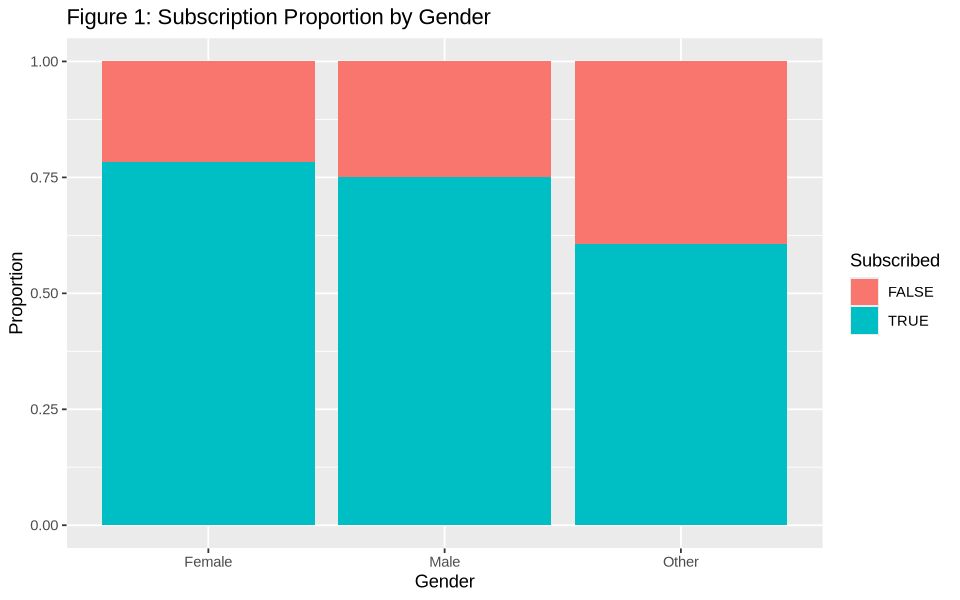

In [79]:
options(repr.plot.width = 8, repr.plot.height = 5)

# subscription rate vs Gender
players <- players |> 
  mutate(gender_grouped = case_when(
    str_to_lower(gender) %in% c("male", "m") ~ "Male",
    str_to_lower(gender) %in% c("female", "f") ~ "Female",
    !is.na(gender) ~ "Other",
    TRUE ~ NA_character_))

gender_chart<-ggplot(players, aes(x = gender_grouped, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Figure 1: Subscription Proportion by Gender",
    x = "Gender",
    y = "Proportion",
    fill = "Subscribed")

gender_chart


From **Figure 1**, we can see that the subscription rates are not the same across gender groups. Players who identify as Female or Male tend to have slightly higher subscription proportions than those in the "Other" category.

This difference suggests that gender may have some influence on whether a player subscribes or not. Although the differences are not dramatic, they are noticeable enough to consider gender as a potentially informative predictor.

For this reason, we included `gender` as one of the variables in our KNN model to help predict subscription behavior.


#### 2.Exploring the Relationship Between Palyer Experience and Subscription

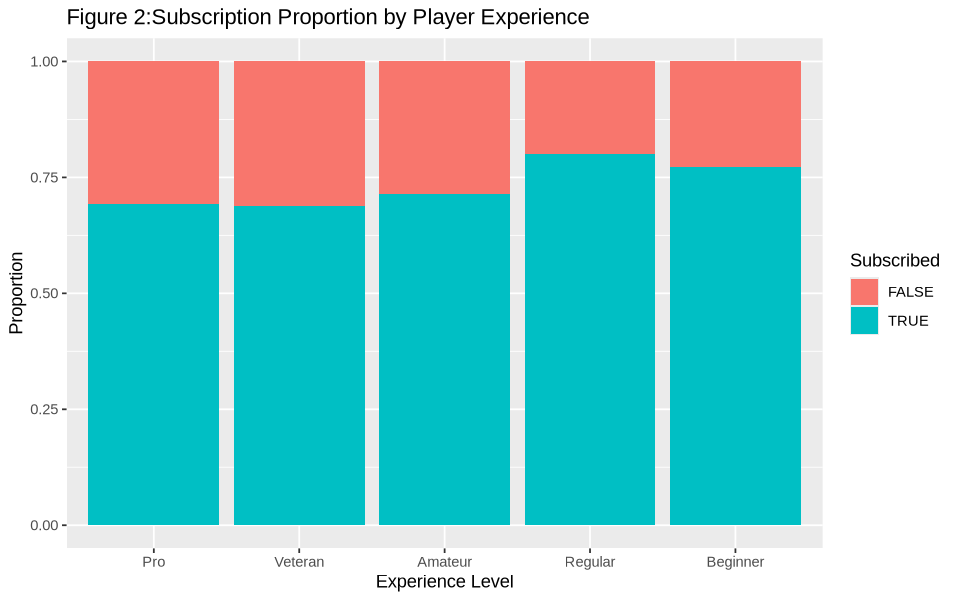

In [80]:
# subscription rate vs Experience level
ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Figure 2:Subscription Proportion by Player Experience",
    x = "Experience Level",
    y = "Proportion",
    fill = "Subscribed")



From **Figure 2**, we can see that subscription rates vary across different experience levels. Beginners and regular players have higher subscription proportions compared to more experienced groups such as veterans and pros.

This trend suggests that less experienced players may be more likely to subscribe, possibly because they are newer to the game and more curious, eager to learn more, or drawn in by early-game features like tutorials or promotions. In contrast, more experienced players may already feel familiar with the game and see less value in subscribing.

Because we observed differences in subscription behavior across experience groups, we decided to include `experience` as one of the predictor variables in our KNN model.


#### 3.Exploring the Relationship Between played hours and Subscription

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


Table 1

subscribe,count,mean_played_hours,sd_played_hours,median_played_hours,min_played_hours,max_played_hours,log10_mean
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,52,0.5019231,1.188258,0.0,0,7.1,0.1122997
TRUE,142,7.8830986,33.112300,0.1,0,223.1,0.2606994


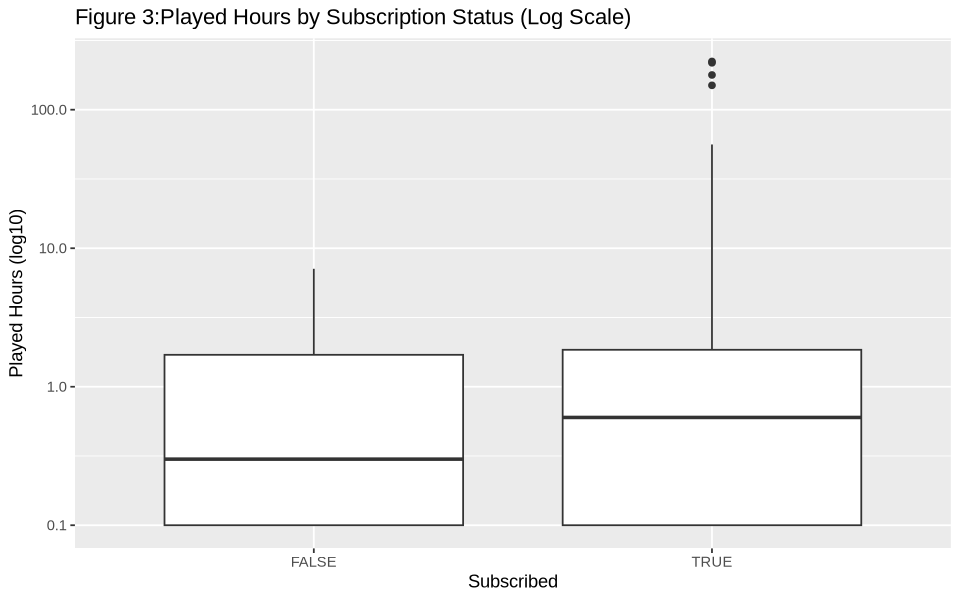

In [81]:
Box_plot_played_hours <- ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(y = "Played Hours (log10)", 
       x = "Subscribed",
       title = "Figure 3:Played Hours by Subscription Status (Log Scale)")

Box_plot_played_hours 

cat("Table 1")
players |>
  group_by(subscribe) |>
  summarize(count = n(),
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    sd_played_hours = sd(played_hours, na.rm = TRUE),
    median_played_hours = median(played_hours, na.rm = TRUE),
    min_played_hours = min(played_hours, na.rm = TRUE),
    max_played_hours = max(played_hours, na.rm = TRUE),
    log10_mean = mean(log10(played_hours + 1), na.rm = TRUE))

From **Figure 3**, we can see that the total played hours differ between subscribed and non-subscribed players. From **table 1**, we can see that on average, subscribed players have significantly more played hours (mean = 7.88) than non-subscribed players (mean = 0.50), and the spread of values is much wider.

However, the boxplot also shows that some subscribed players barely played the game, while some non-subscribed players played for many hours. This means that although there is a general trend, played hours alone does not fully explain subscription behavior.Because Figure 3 shows a noticeable difference in distribution between the two groups, we decided to include `played_hours` as a predictor variable in our KNN model.

Note:

1.We used a log10 scale for the y-axis in Figure 3 because the `played_hours` variable is highly skewed. Most players spent very little time in the game, while a small number of players played for many hours (up to 223 hours). This large range creates a long right tail in the distribution. 

2.Players with 0 played hours were excluded from the plot due to the log10 scale transformation.


**Following the strange patterns we observed in Figure 3, we wanted to take a closer look at how playtime might relate to subscription behavior.**

Although subscribed players had a much higher average played time (mean = 7.88 hours) than non-subscribed players (mean = 0.50 hours), the median played time for subscribed players was only 0.1 hours. This suggests that many subscribed players barely played the game at all, which goes against the common assumption that players would subscribe only after spending more time in the game.

This led us to ask a more specific question: **Did players subscribe if they played?**


In [82]:
cat("Table 2")

players |> 
  mutate(played_any = played_hours > 0) |>
  count(played_any, subscribe)


Table 2

played_any,subscribe,n
<lgl>,<fct>,<int>
FALSE,FALSE,27
FALSE,TRUE,58
TRUE,FALSE,25
TRUE,TRUE,84


From **Table 2**, we can interpret the following:

- **FALSE / FALSE (n = 27):** These players did not play the game and did not subscribe.
- **FALSE / TRUE (n = 58):** These players subscribed even though they never played the game.
- **TRUE / FALSE (n = 25):** These players played the game but chose not to subscribe.
- **TRUE / TRUE (n = 84):** These players both played and subscribed.

The most surprising result is that **58 players subscribed without playing**, which is more than double the number of players who didn’t play and didn’t subscribe (27). This shows that playtime is not always a requirement for subscription, and some players might be subscribing for other reasons not directly related to gameplay.This unusual pattern suggests that playtime alone is not a reliable predictor of subscription, and that other variables should also be considered in the model.



#### 4.Exploring the Relationship Between Age and Subscription

Table 3

subscribe,count,mean_age,sd_age,median_age,min_age,max_age
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,52,22.98077,8.166143,21,17,50
TRUE,142,19.61972,5.001748,18,8,49


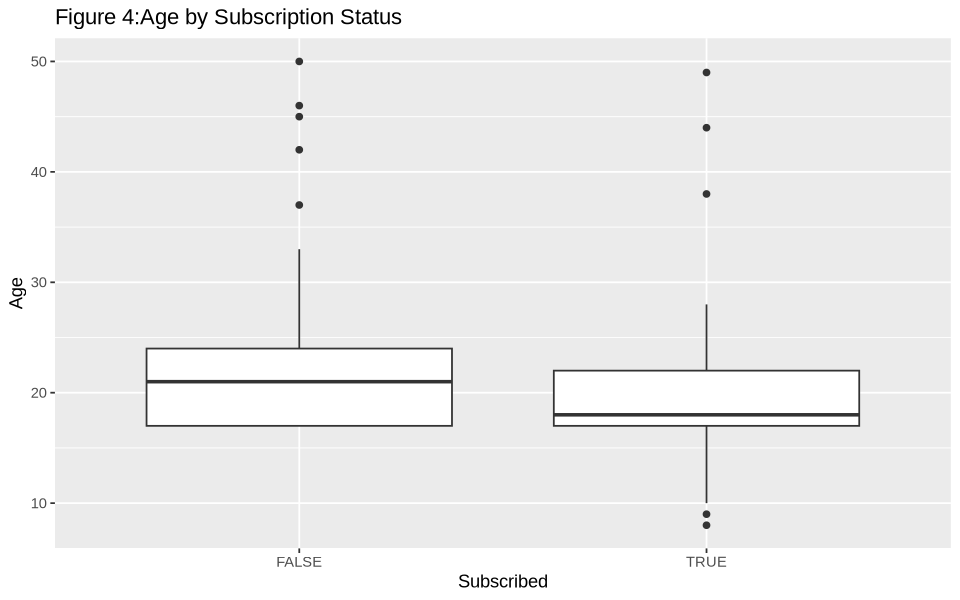

In [83]:
Box_plot_age <- ggplot(players, aes(x = subscribe, y = Age)) +
  geom_boxplot() +
  labs(y = "Age", 
       x = "Subscribed",
       title = "Figure 4:Age by Subscription Status")

Box_plot_age

cat("Table 3")
players |>
  group_by(subscribe) |>
  summarize(
    count = n(),
    mean_age = mean(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE),
    median_age = median(Age, na.rm = TRUE),
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE))


From **Figure 4**, we can see that the age distribution differs between subscribed and non-subscribed players. From **table 3**, we can see that on average, subscribed players are younger (mean = 19.6 years, median = 18) compared to non-subscribed players (mean = 23.0 years, median = 21). The age range is also slightly wider for non-subscribers.

This trend suggests that younger players may be more likely to subscribe. Possible reasons could include being newer to the game, more curious about updates, or more responsive to marketing efforts. Meanwhile, older players may already feel familiar with the game and less interested in subscribing to a newsletter.

Although the difference is not dramatic, it still provides a useful signal. Based on this observation, we decided to include `Age` as one of the predictor variables in our KNN model.


#### 5.Subscription and the Combination of Age and Hours Played


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


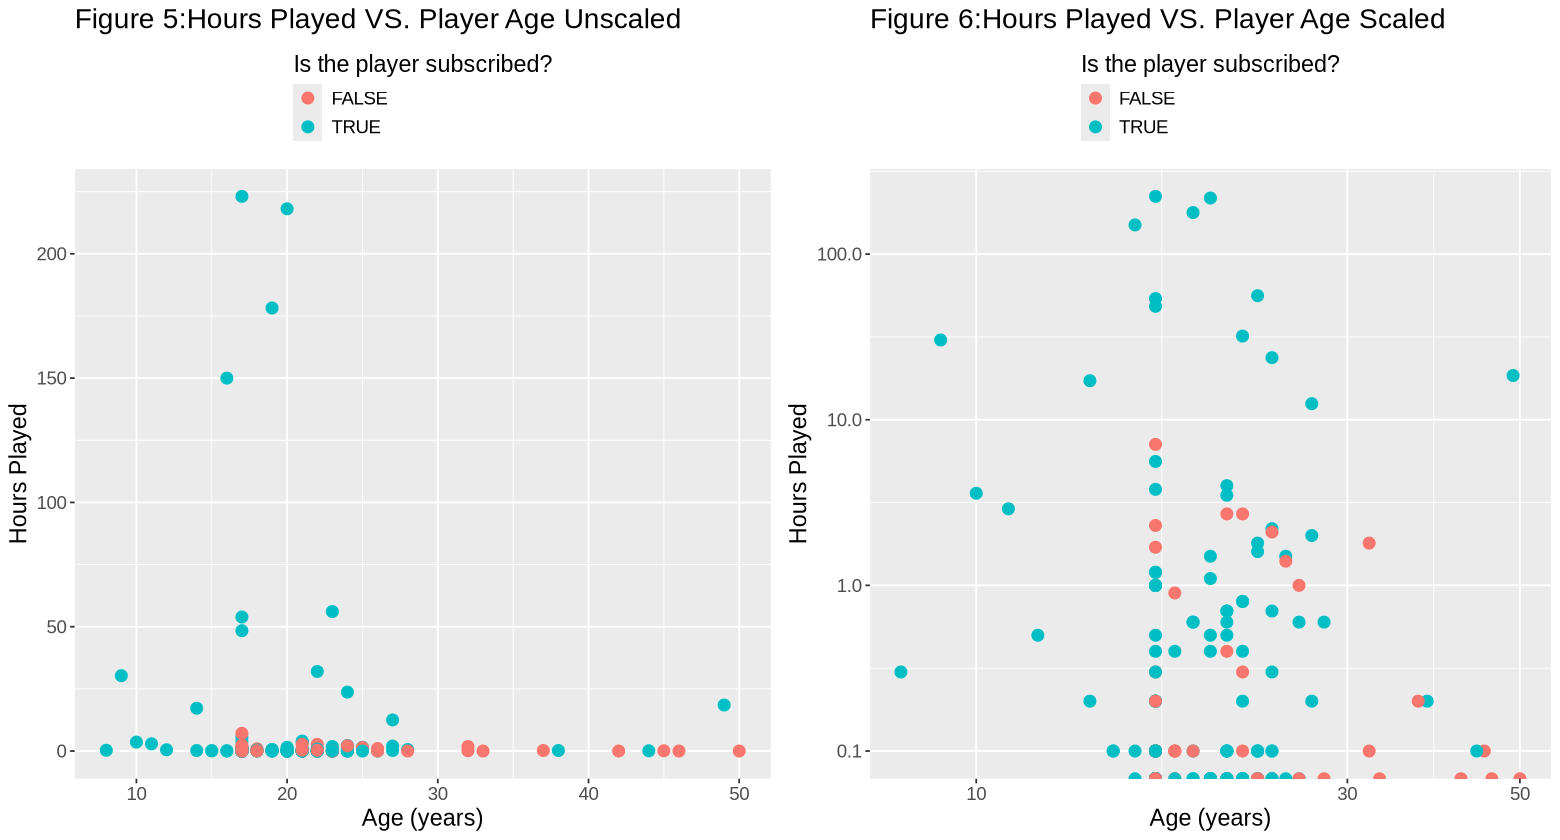

In [84]:
options(repr.plot.width = 13, repr.plot.height = 7)

age_v_hrs <- ggplot(players, aes(x = Age, y = played_hours, colour = subscribe)) +
geom_point(size = 3) +
labs(x = "Age (years)", y = "Hours Played", colour = "Is the player subscribed?") +
ggtitle("Figure 5:Hours Played VS. Player Age Unscaled") +
theme(text = element_text(size = 14),
legend.position = "top",
legend.direction = "vertical")

age_v_hrs_scaled <- age_v_hrs +
scale_y_log10() +
scale_x_log10() +
ggtitle("Figure 6:Hours Played VS. Player Age Scaled")

plot_grid(age_v_hrs, age_v_hrs_scaled)

In **Figure 5** and **Figure 6**, we explore the relationship between player age and played hours and if there is any correlation between these and whether a player is subscribed or not. We explored this relationship to see if a combination of these two variables could help explain or predict subscription behavior. On the left was the original graph created, which was unscaled. Looking at this graph, we can see that there is a lot of points towards the bottom, and it looks like they are possibly overlapping by a lot. So, we decided to scale both the axes by log10. We can see the result of this in Figure 6, where the points are more spread out and not overlapping as much. Figure 6 also shows us that there are no distinct clusters for subscribed versus unsubscribed players due to age and hours played. So, from this graph, we wanted to use more variables as predictors in our model. However, we explore this more below.





<div align="center">

### **Building the KNN Classification Model**

</div>
In this section, we build a K-Nearest Neighbors (KNN) classification model to predict whether a player subscribes to the newsletter based on selected features from our exploratory analysis.



### 1. Forward Selection
Forward selection helps us answer: which features actually improve the model, and which ones don’t?


In [91]:
set.seed(1)

cat("Table 4")
# Step 1: Clean and prepare data
players_clean <- players |>
  select(subscribe, Age, gender, played_hours, experience) |>
  mutate(
    gender = case_when(
      gender == "Male" ~ "Male",
      gender == "Female" ~ "Female",
      TRUE ~ "Other"
    ),
    gender = as.factor(gender),
    experience = as.factor(experience),
    subscribe = as.factor(subscribe)
  )

# Step 2: Extract all feature names (excluding target)
all_features <- colnames(players_clean |> select(-subscribe))

# Step 3: Create tibble to store results
accuracies <- tibble(
  size = integer(),
  model_string = character(),
  accuracy = numeric()
)

# Step 4: Set up KNN model spec
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Step 5: 5-fold cross-validation object
players_vfold <- vfold_cv(players_clean, v = 5, strata = subscribe)

# Step 6: Forward selection loop
selected <- c()
remaining <- all_features

for (i in 1:length(all_features)) {
  accs <- list()
  models <- list()
  
  for (j in 1:length(remaining)) {
    test_feature <- remaining[j]
    current_features <- c(selected, test_feature)
    
    model_string <- paste("subscribe ~", paste(current_features, collapse = "+"))
    
    rec <- recipe(as.formula(model_string), data = players_clean) |>
      step_dummy(all_nominal_predictors()) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())
    
    wf <- workflow() |>
      add_recipe(rec) |>
      add_model(knn_spec)
    
    set.seed(123)
    res <- tune_grid(
      wf,
      resamples = players_vfold,
      grid = 5,
      metrics = metric_set(yardstick::accuracy)
    )
    
    best_acc <- res |>
      collect_metrics() |>
      filter(.metric == "accuracy") |>
      summarize(mx = max(mean)) |>
      pull(mx)
    
    accs[[j]] <- best_acc
    models[[j]] <- model_string
  }
  
  best_j <- which.max(unlist(accs))
  selected <- selected |> append(remaining[best_j])
  remaining <- remaining[-best_j]
  
  accuracies <- accuracies |>
    add_row(
      size = i,
      model_string = models[[best_j]],
      accuracy = round(unlist(accs)[best_j], 3)
    )
}

# Step 7: Print final output
accuracies


Table 4

size,model_string,accuracy
<int>,<chr>,<dbl>
1,subscribe ~ Age,0.747
2,subscribe ~ Age+played_hours,0.737
3,subscribe ~ Age+played_hours+gender,0.726
4,subscribe ~ Age+played_hours+gender+experience,0.707


As shown in **table 4**, adding more features did not necessarily improve the model's accuracy. In fact, the model with only `Age` as the predictor achieved the highest accuracy (0.747), while the full model including all four predictors performed worse (accuracy = 0.707).

However, accuracy alone does not tell the whole story. It only measures the overall proportion of correct predictions, but does not reveal how well the model performs for each class — especially for the subscribed class, which is more important in this case. Therefore, we also decided to evaluate our models using additional metrics such as **recall** and **precision** to better understand the trade-offs.


## 2. Building the KNN Model


### 2.1 Comparing Different Feature Combinations

After tuning our model using cross-validation to find the best value of `k`, we now want to compare how different combinations of features affect the model’s performance.

We do this to answer a key question: **Which combination of features helps us best predict whether a player will subscribe?**

To answer this, we will:

- Build 4 different KNN models using different combinations of features (based on forward selection results).
- Use the best `k` value for all models (selected using cross-validation).
- Evaluate each model using multiple metrics: **accuracy**, **recall**, and **precision**.
- Compare the results to find which model performs best overall — especially for predicting the **subscribed** group.

This helps us go beyond just accuracy and see how well the models handle different types of prediction errors (like false positives and false negatives).


### 2.1.1 Model 1: Using Age Only as a Predictor


Table 5

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939
kap,binary,0.0000000


          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     13   36

[1] 29 30

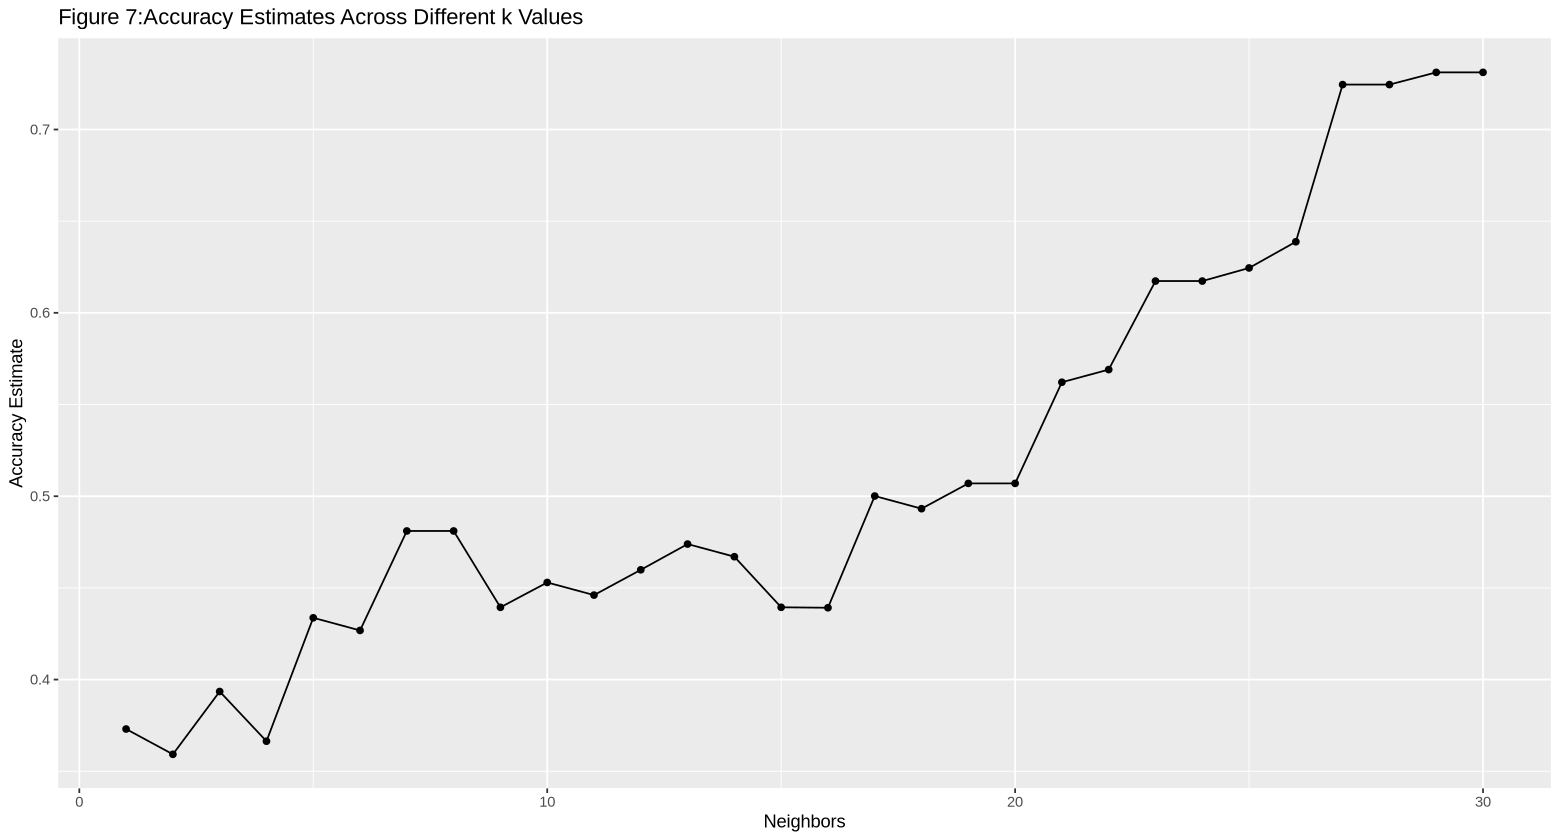

In [94]:
set.seed(1)
library(themis)

cat("Table 5")
# Prepare data
players_age <- players |>
  mutate(subscribe = as_factor(subscribe))

# Split data
players_split_age <- initial_split(players_age, prop = 0.75, strata = subscribe)
players_train_age <- training(players_split_age)
players_test_age <- testing(players_split_age)

# Create recipe
players_recipe_age <- recipe(subscribe ~ Age, data = players_train_age) |>
  step_scale(Age) |>
  step_center(Age)

# Model specification
players_spec_age <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Cross-validation
vfold_age <- vfold_cv(players_train_age, v = 5, strata = subscribe)

# Try different k values
k_vals_age <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# Tune model
players_metrics_age <- workflow() |>
  add_recipe(players_recipe_age) |>
  add_model(players_spec_age) |>
  tune_grid(resamples = vfold_age, grid = k_vals_age) |>
  collect_metrics()

# View accuracy plot
accuracy_age <- players_metrics_age |>
  filter(.metric == "accuracy")

cross_val_plot_age <- ggplot(accuracy_age, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",title="Figure 7:Accuracy Estimates Across Different k Values")

cross_val_plot_age

# Get best k
best_k_age <- accuracy_age |>
  slice_max(mean) |>
  select(neighbors) |>
  pull()

# Final spec with best k
final_spec_age <- nearest_neighbor(weight_func = "rectangular", neighbors = min(best_k_age)) |>
  set_engine("kknn") |>
  set_mode("classification")

# Fit final model
players_fit_age <- workflow() |>
  add_recipe(players_recipe_age) |>
  add_model(final_spec_age) |>
  fit(data = players_train_age)

# Predict on test data
player_predictions_age <- predict(players_fit_age, players_test_age) |>
  bind_cols(players_test_age)

# Metrics and confusion matrix
players_metrics_test_age <- player_predictions_age |>
  metrics(truth = subscribe, estimate = .pred_class)

players_conf_mat_age <- player_predictions_age |>
  conf_mat(truth = subscribe, estimate = .pred_class)

players_metrics_test_age
players_conf_mat_age
best_k_age

### 2.1.2 Model 2: Using Age and Played Hours as Predictors


Table 6

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939
kap,binary,0.0000000


          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     13   36

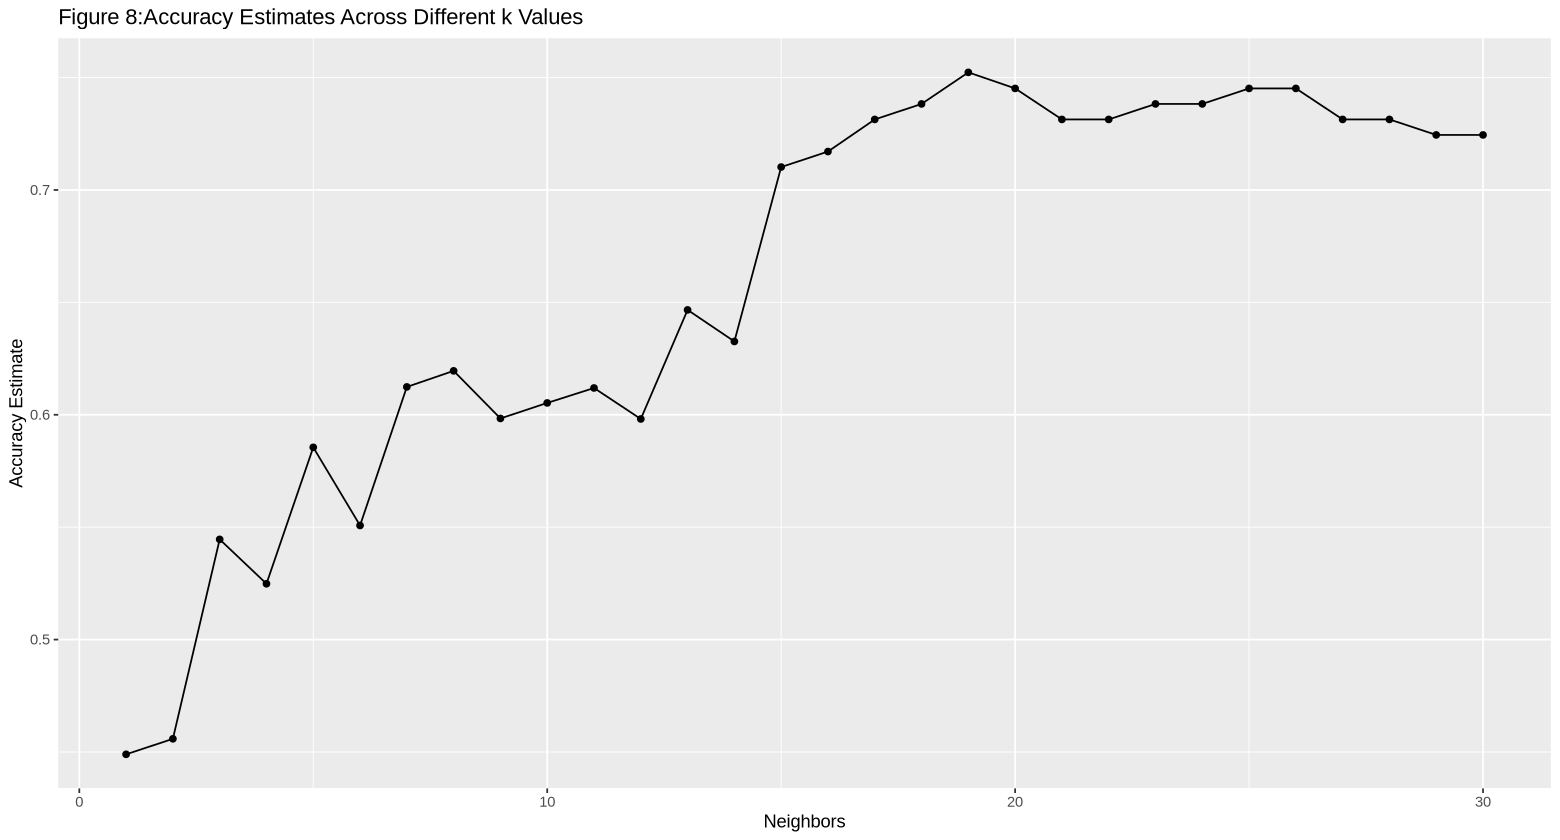

In [95]:
set.seed(1)

cat("Table 6")

# Prepare data
players_age_hours <- players |>
  mutate(subscribe = as_factor(subscribe))

# Split data
players_split_age_hours <- initial_split(players_age_hours, prop = 0.75, strata = subscribe)
players_train_age_hours <- training(players_split_age_hours)
players_test_age_hours <- testing(players_split_age_hours)

# Create recipe
players_recipe_age_hours <- recipe(subscribe ~ Age + played_hours, data = players_train_age_hours) |>
  step_scale(Age, played_hours) |>
  step_center(Age, played_hours)

# Model specification
players_spec_age_hours <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Cross-validation
vfold_age_hours <- vfold_cv(players_train_age_hours, v = 5, strata = subscribe)

# Try different k values
k_vals_age_hours <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# Tune model
players_metrics_age_hours <- workflow() |>
  add_recipe(players_recipe_age_hours) |>
  add_model(players_spec_age_hours) |>
  tune_grid(resamples = vfold_age_hours, grid = k_vals_age_hours) |>
  collect_metrics()

# View accuracy plot
accuracy_age_hours <- players_metrics_age_hours |>
  filter(.metric == "accuracy")

cross_val_plot_age_hours <- ggplot(accuracy_age_hours, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",title="Figure 8:Accuracy Estimates Across Different k Values")

cross_val_plot_age_hours

# Get best k
best_k_age_hours <- accuracy_age_hours |>
  slice_max(mean) |>
  select(neighbors) |>
  pull()

# Final spec with best k
final_spec_age_hours <- nearest_neighbor(weight_func = "rectangular", neighbors = min(best_k_age_hours)) |>
  set_engine("kknn") |>
  set_mode("classification")

# Fit final model
players_fit_age_hours <- workflow() |>
  add_recipe(players_recipe_age_hours) |>
  add_model(final_spec_age_hours) |>
  fit(data = players_train_age_hours)

# Predict on test data
player_predictions_age_hours <- predict(players_fit_age_hours, players_test_age_hours) |>
  bind_cols(players_test_age_hours)

# Metrics and confusion matrix
players_metrics_test_age_hours <- player_predictions_age_hours |>
  metrics(truth = subscribe, estimate = .pred_class)

players_conf_mat_age_hours <- player_predictions_age_hours |>
  conf_mat(truth = subscribe, estimate = .pred_class)

players_metrics_test_age_hours
players_conf_mat_age_hours


### 2.1.3 Model 2: Using Age, Played Hours, and Gender as Predictors

Table 7

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.73469388
kap,binary,0.06734993


          Truth
Prediction FALSE TRUE
     FALSE     1    1
     TRUE     12   35

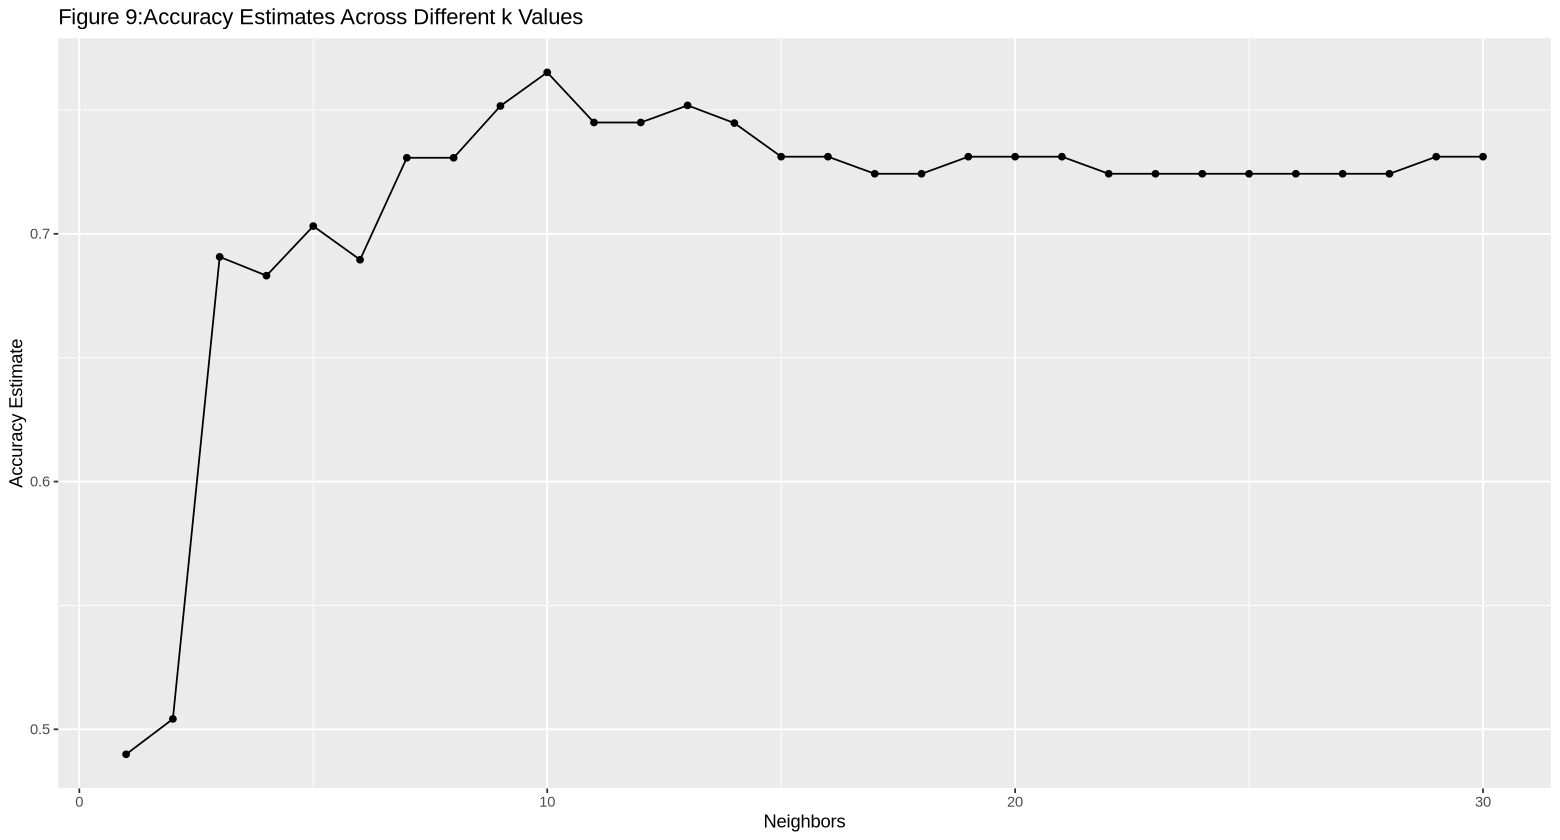

In [96]:
set.seed(1)
library(themis)

cat("Table 7")

# Prepare data
players_age_hours_gender <- players |>
  mutate(subscribe = as_factor(subscribe))

# Split data
players_split_age_hours_gender <- initial_split(players_age_hours_gender, prop = 0.75, strata = subscribe)
players_train_age_hours_gender <- training(players_split_age_hours_gender)
players_test_age_hours_gender <- testing(players_split_age_hours_gender)

# Create recipe
players_recipe_age_hours_gender <- recipe(subscribe ~ Age + played_hours + gender, data = players_train_age_hours_gender) |>
  step_scale(Age, played_hours) |>
  step_center(Age, played_hours) |>
  step_dummy(all_nominal_predictors())

# Model specification
players_spec_age_hours_gender <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Cross-validation
vfold_age_hours_gender <- vfold_cv(players_train_age_hours_gender, v = 5, strata = subscribe)

# Try different k values
k_vals_age_hours_gender <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# Tune model
players_metrics_age_hours_gender <- workflow() |>
  add_recipe(players_recipe_age_hours_gender) |>
  add_model(players_spec_age_hours_gender) |>
  tune_grid(resamples = vfold_age_hours_gender, grid = k_vals_age_hours_gender) |>
  collect_metrics()

# View accuracy plot
accuracy_age_hours_gender <- players_metrics_age_hours_gender |>
  filter(.metric == "accuracy")

cross_val_plot_age_hours_gender <- ggplot(accuracy_age_hours_gender, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",title="Figure 9:Accuracy Estimates Across Different k Values")

cross_val_plot_age_hours_gender

# Get best k
best_k_age_hours_gender <- accuracy_age_hours_gender |>
  slice_max(mean) |>
  select(neighbors) |>
  pull()

# Final spec with best k
final_spec_age_hours_gender <- nearest_neighbor(weight_func = "rectangular", neighbors = min(best_k_age_hours_gender)) |>
  set_engine("kknn") |>
  set_mode("classification")

# Fit final model
players_fit_age_hours_gender <- workflow() |>
  add_recipe(players_recipe_age_hours_gender) |>
  add_model(final_spec_age_hours_gender) |>
  fit(data = players_train_age_hours_gender)

# Predict on test data
player_predictions_age_hours_gender <- predict(players_fit_age_hours_gender, players_test_age_hours_gender) |>
  bind_cols(players_test_age_hours_gender)

# Metrics and confusion matrix
players_metrics_test_age_hours_gender <- player_predictions_age_hours_gender |>
  metrics(truth = subscribe, estimate = .pred_class)

players_conf_mat_age_hours_gender <- player_predictions_age_hours_gender |>
  conf_mat(truth = subscribe, estimate = .pred_class)

players_metrics_test_age_hours_gender
players_conf_mat_age_hours_gender


### 2.1.4 Model 4: Using All Four Predictors — Age, Played Hours, Experience, and Gender


Table 8

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7551020
kap,binary,0.1671388


          Truth
Prediction FALSE TRUE
     FALSE     2    1
     TRUE     11   35

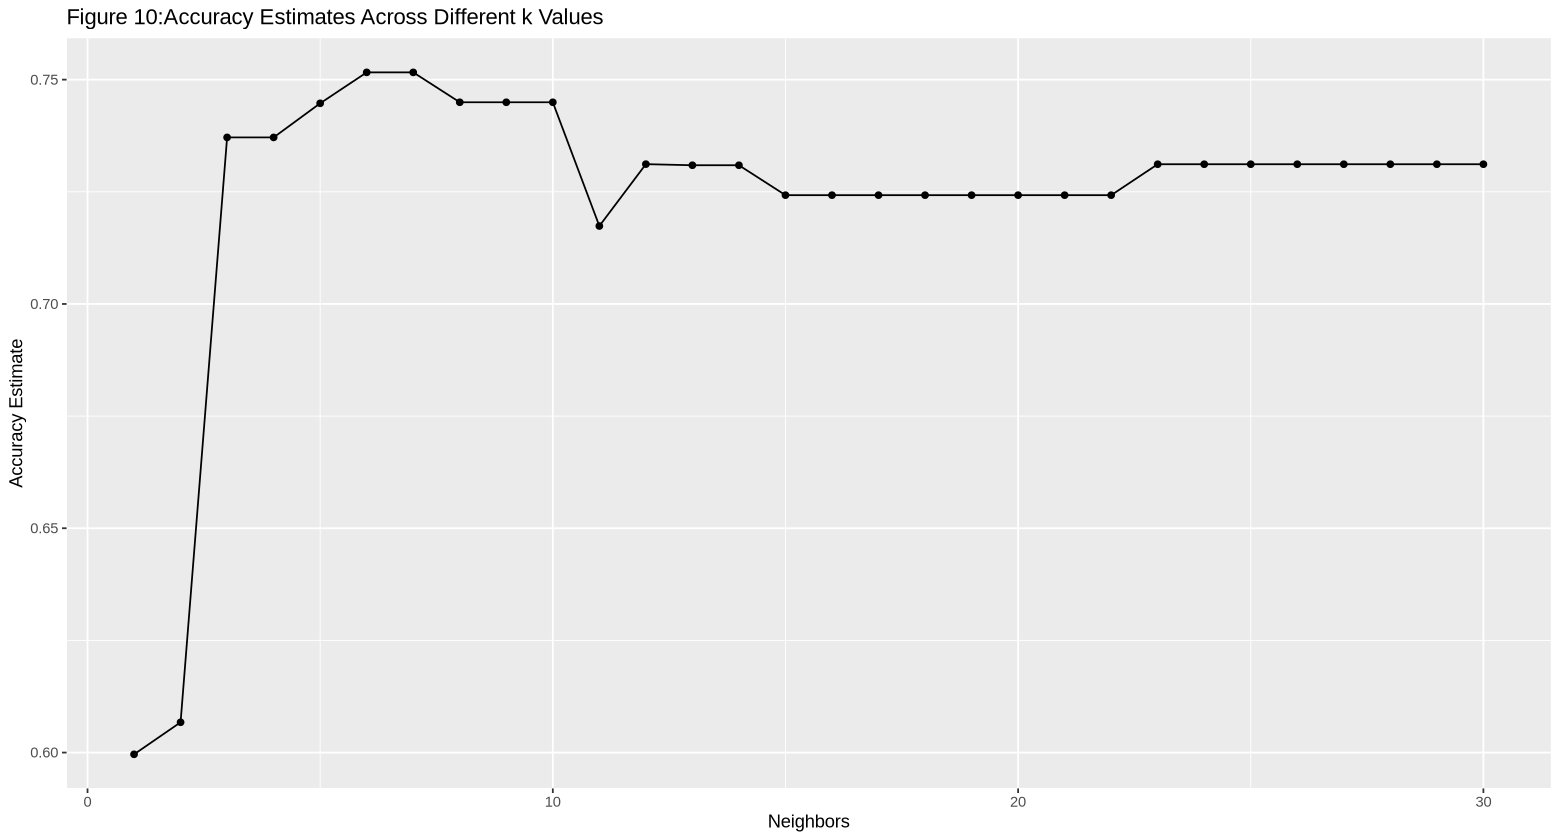

In [97]:
set.seed(1)
library(themis)
cat("Table 8")

# Prepare data
players_full <- players |>
  mutate(subscribe = as_factor(subscribe))

# Split data
players_split_full <- initial_split(players_full, prop = 0.75, strata = subscribe)
players_train_full <- training(players_split_full)
players_test_full <- testing(players_split_full)

# Create recipe
players_recipe_full <- recipe(subscribe ~ Age + played_hours + experience + gender, data = players_train_full) |>
  step_scale(Age, played_hours) |>
  step_center(Age, played_hours) |>
  step_dummy(all_nominal_predictors())

# Model specification
players_spec_full <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Cross-validation
vfold_full <- vfold_cv(players_train_full, v = 5, strata = subscribe)

# Try different k values
k_vals_full <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# Tune model
players_metrics_full <- workflow() |>
  add_recipe(players_recipe_full) |>
  add_model(players_spec_full) |>
  tune_grid(resamples = vfold_full, grid = k_vals_full) |>
  collect_metrics()

# View accuracy plot
accuracy_full <- players_metrics_full |>
  filter(.metric == "accuracy")

cross_val_plot_full <- ggplot(accuracy_full, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",title="Figure 10:Accuracy Estimates Across Different k Values")

cross_val_plot_full

# Get best k
best_k_full <- accuracy_full |>
  slice_max(mean) |>
  select(neighbors) |>
  pull()

# Final spec with best k
final_spec_full <- nearest_neighbor(weight_func = "rectangular", neighbors = min(best_k_full)) |>
  set_engine("kknn") |>
  set_mode("classification")

# Fit final model
players_fit_full <- workflow() |>
  add_recipe(players_recipe_full) |>
  add_model(final_spec_full) |>
  fit(data = players_train_full)

# Predict on test data
player_predictions_full <- predict(players_fit_full, players_test_full) |>
  bind_cols(players_test_full)

# Metrics and confusion matrix
players_metrics_test_full <- player_predictions_full |>
  metrics(truth = subscribe, estimate = .pred_class)

players_conf_mat_full <- player_predictions_full |>
  conf_mat(truth = subscribe, estimate = .pred_class)

players_metrics_test_full
players_conf_mat_full


### 2.2: summary table
We used the evaluation results from Table 6 to Table 8 to create a summary table comparing the performance of the four KNN models.


In [98]:
cat("Table 9: summary table(compare each model)")
model_summary <- tibble::tibble(
  Model = c(
    "Age Only",
    "Age + Played Hours",
    "Age + Played Hours + Gender",
    "All Predictors"),
  Accuracy = c(0.7347, 0.7347, 0.7347, 0.7551),
  Kappa = c(0.0000, 0.0000, 0.0673, 0.1671),
  Recall = c(1.0000, 1.0000, 1.0000, 0.9722),
  Precision = c(0.7347, 0.7347, 0.7347, 0.7609))
model_summary 

cat("Table 10: True and False proportion for whole sample")
players |>
  count(subscribe) |>
  mutate(proportion = n / sum(n))

Table 9: summary table(compare each model)

Model,Accuracy,Kappa,Recall,Precision
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age Only,0.7347,0.0000,1.0000,0.7347
Age + Played Hours,0.7347,0.0000,1.0000,0.7347
Age + Played Hours + Gender,0.7347,0.0673,1.0000,0.7347
All Predictors,0.7551,0.1671,0.9722,0.7609


Table 10: True and False proportion for whole sample

subscribe,n,proportion
<fct>,<int>,<dbl>
FALSE,52,0.2680412
TRUE,142,0.7319588


From **Table 9**, we can see that the first three models all had a **recall of 1.0000**. But this doesn’t mean they were very good. These models predicted that **everyone subscribed**, so they didn’t miss any real subscribers. However, they also made many mistakes by saying non-subscribers were subscribers. That’s why the **precision** was only **0.7347**.

At first, this precision seems okay. But if we look at **Table 10**, we see that about **73% of players actually subscribed** in the full dataset. This means that even if a model predicts "TRUE" for everyone, the precision would still be around 73% — just because most people subscribed. These models didn’t really learn how to find non-subscribers, which makes them less useful.

The **final model**, which used all four variables, performed better. It had a **higher precision (0.7609)** and still a **high recall (0.9722)**. This means it made fewer mistakes and correctly found most of the subscribers.

**So, we chose the final model as our best-performing model** because it gave the best balance between precision and recall.


<div align="center">

## **Section 3. Discussion:**

</div>

### 3.1 What We Found

#### 1. What We Discovered from the Data

Through our data exploration, we found that all four variables — **age, gender, played hours, and experience level** — were related in some way to whether a player subscribed.

One surprising finding was that many players subscribed even though they had **never played the game**. This showed us that playtime is not the only factor influencing subscription. It could be that some players subscribed out of curiosity or because of outside promotions.

We also noticed that the **played hours** variable was very skewed. Most players played very little, while a small number of players had very high playtime. Because of this, we used a log scale in our visualization to better compare the distribution between groups.

#### 2. What We Discovered from the Models

When we built and tested different KNN models, we found that the first three models predicted that **all players subscribed**. This gave them a **perfect recall**, but they also made many mistakes by predicting non-subscribers as subscribers. Their precision was low, and they didn’t really help us tell different types of players apart.

The **final model**, which used all four variables, was more balanced. It was the only model that correctly predicted **both subscribed and non-subscribed** players. It had a **higher precision** and still a **high recall**, meaning it made fewer mistakes and captured most actual subscribers.

Because of this, we chose the **final model** as our best-performing model. It gave the most balanced and meaningful predictions.



### 3.2 Was This What We Expected?

At the beginning of the project, we expected that features like **played hours** and **age** would have a clear link to whether someone subscribed. For example, we thought that players who spent more time in the game would be more likely to subscribe, and that younger players might behave differently than older ones.

However, the results were not as clear as we expected. Many players who had **never played the game** still subscribed, and some players with high playtime **did not** subscribe at all. This made it difficult for the model to find strong patterns based only on engagement or age.

This surprised us because we assumed that player behavior in the game would be the main factor influencing subscription. Instead, we found that other factors — possibly outside of what’s in the dataset — may be influencing a player’s decision to subscribe, such as personal interest, external rewards, or exposure to promotions.

Even though we used four different features, the model still had limits. This reminded us that predicting human decisions is complex, and even when data looks promising, the patterns may not be easy to find.


### 3.3 Why This Matters

Our findings show that even simple features like age, playtime, and experience can give us some insight into player behavior — but not the full picture. The fact that many players subscribed without playing suggests that **subscription decisions may be influenced by factors outside of in-game behavior**.

This matters for game developers and marketing teams. If they rely only on in-game data to understand their players, they might miss important patterns. For example, some players may subscribe because of outside promotions, community influence, or curiosity — not because they enjoy or engage with the game.

It also reminds us that **high accuracy doesn't always mean a useful model**. The early models looked accurate but didn’t actually help identify non-subscribers. Only when we used all four variables did the model start making more balanced and meaningful predictions.

Overall, this project shows the importance of choosing the right features and evaluation methods. It also shows that player behavior is complex, and we need to think carefully about what our models are really telling us.


### 3.4 Future Questions

While we were able to build a working model, this project also made us ask new questions.

One big question is: **Why do some players subscribe even if they never play the game?** This shows that there may be other factors — like early access, emails, or outside promotions — that we can’t see in the dataset.

We also wonder if adding more data could help. For example:
- Would login time, time of day, or session count help us better understand behavior?
- Would including social features, like inviting friends or in-game messages, improve predictions?

Another direction could be trying other models, like **logistic regression** or **decision trees**, and comparing their results to KNN.

Finally, we learned that sometimes, even with clean data and a good method, it's hard to find clear answers. But that's part of data science — learning what the data can and can't tell us, and asking better questions next time.


### Final Answer to Our Research Question


Our results show that **no single player characteristic — gender, age, experience, or played hours — could clearly predict subscription to the newsletter**. We expected that players who played more or had certain experience levels would be more likely to subscribe, but the patterns were not strong or consistent.

This suggests that player behavior is more complex than we thought. While each variable gave us a bit of information, it wasn’t enough on its own.

However, when we combined **all four features**, our model performed better. The final model was the only one that could correctly identify both subscribed and non-subscribed players. This shows that a **combination of characteristics** is more helpful than any one feature by itself.

That said, the model was only **better compared to the others** — it was not a perfect or highly accurate solution. The improvement was small, and the overall performance showed that there are still many **important factors missing**. Player behavior is complex, and these four features alone are not enough to fully explain or predict subscription decisions. We likely need **more variables** — such as motivation, social influence, or interaction history — to improve the model in the future.


